In [10]:
import os

import fastf1
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [19]:
basepath = "c:/Users/paulw/OneDrive/Desktop/GitHub/005_Formula_One"

cache_folder: str = os.path.join(basepath, "data/cache")

if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [20]:
session = fastf1.get_session(2023, "Monaco", 'R')
session.load()

print("Cache enabled and session data loaded successfully.")

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

Cache enabled and session data loaded successfully.


In [21]:
laps = session.laps
df = laps[["Driver", "LapTime", "Compound"]]

In [22]:
df.head()

,Driver,LapTime,Compound
0,VER,0 days 00:01:24.238000,MEDIUM
1,VER,0 days 00:01:19.367000,MEDIUM
2,VER,0 days 00:01:19.074000,MEDIUM
3,VER,0 days 00:01:18.129000,MEDIUM
4,VER,0 days 00:01:18.019000,MEDIUM


In [23]:
compound_counts = df.pivot_table(index="Driver", columns="Compound", aggfunc="size", fill_value=0)
compound_counts.columns.name = None  # Remove the name of the columns index
compound_counts.reset_index(inplace=True)
compound_counts.set_index("Driver", inplace=True)

<Figure size 1200x600 with 0 Axes>

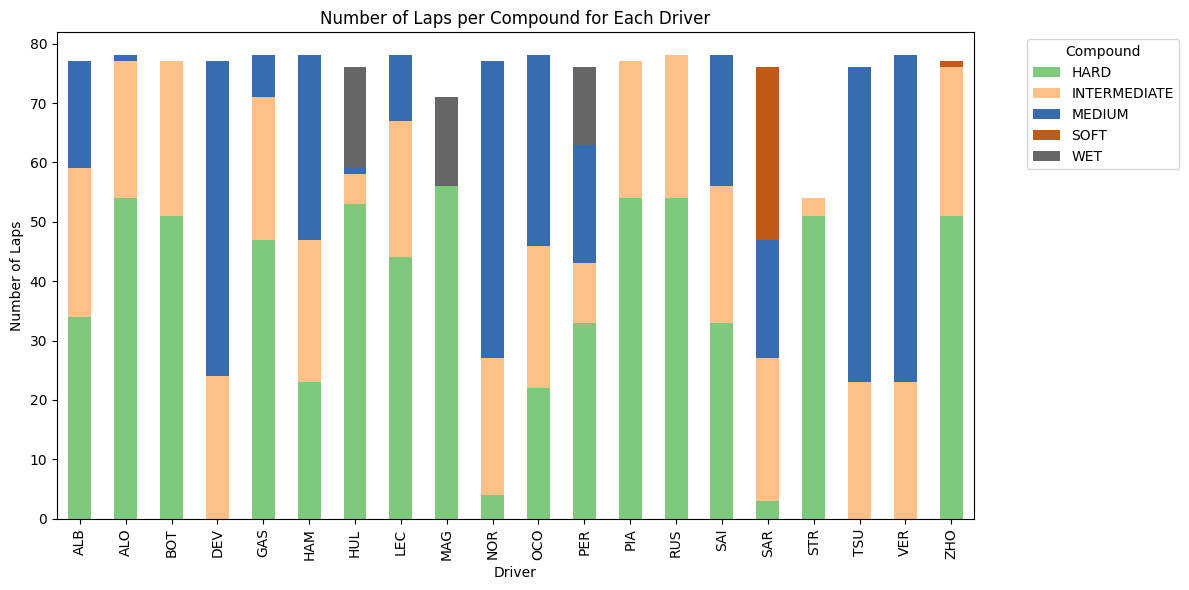

In [24]:
plt.figure(figsize=(12, 6))
compound_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Number of Laps per Compound for Each Driver')
plt.ylabel('Number of Laps')
plt.xlabel('Driver')
plt.legend(title='Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()